# Lecture 15: BioPython

CBIO (CSCI) 4835/6835: Introduction to Computational Biology

## Overview and Objectives

BioPython is a versatile Python package for computational biology, particularly if your interest is in sequence analysis. In addition to performing multiple alignments, it can download sequences from the internet, construct phylogenetic trees, and even run population genetics simulations. By the end of this lecture, you should be able to:

 - Be familiar with the basic submodules of BioPython, such as
   - Sequence alignment
   - Motif finding
   - Online BLAST searches
   - building phylogenetic trees
   - Finding "fuzzy" motifs

## Part 1: BioPython

*Biopython features include parsers for various Bioinformatics file formats (BLAST, Clustalw, FASTA, Genbank,...), access to online services (NCBI, Expasy,...), interfaces to common and not-so-common programs (Clustalw, DSSP, MSMS...), a standard sequence class, various clustering modules, a KD tree data structure etc. and even documentation.*

Other modules that might be of interest:

 *   Pycogent: http://pycogent.org/
 *   bx-python: https://github.com/bxlab/bx-python
 *   DendroPy: https://pythonhosted.org/DendroPy/

### Sequence Data

Recall from lectures gone by: http://www.ncbi.nlm.nih.gov/gene/5216

### FASTA Format

First line is description of sequence and starts with >

All lines up to the next > are part of the same sequence

Usually fewer than 80 characters per line

```
>gi|568815581:c4949086-4945650 Homo sapiens chromosome 17, GRCh38.p2 Primary Assembly
CCCGCAGGGTCCACACGGGTCGGGCCGGGCGCGCTCCCGTGCAGCCGGCTCCGGCCCCGACCGCCCCATG
CACTCCCGGCCCCGGCGCAGGCGCAGGCGCGGGCACACGCGCCGCCGCCCGCCGGTCCTTCCCTTCGGCG
GAGGTGGGGGAAGGAGGAGTCATCCCGTTTAACCCTGGGCTCCCCGAACTCTCCTTAATTTGCTAAATTT
GCAGCTTGCTAATTCCTCCTGCTTTCTCCTTCCTTCCTTCTTCTGGCTCACTCCCTGCCCCGATACCAAA
GTCTGGTTTATATTCAGTGCAAATTGGAGCAAACCCTACCCTTCACCTCTCTCCCGCCACCCCCCATCCT
TCTGCATTGCTTTCCATCGAACTCTGCAAATTTTGCAATAGGGGGAGGGATTTTTAAAATTGCATTTGCA
```

### GenBank

Annotated format.  Starts with `LOCUS` field.  Can have several other annotation (e.g. `KEYWORDS`, `SOURCE`, `REFERENCE`, `FEATURES`).

`ORIGIN` record indicates start of sequence

'`\\`' indicates the end of sequence

```
LOCUS       CAG28598                 140 aa            linear   PRI 16-OCT-2008
DEFINITION  PFN1, partial [Homo sapiens].
ACCESSION   CAG28598
VERSION     CAG28598.1  GI:47115277
DBSOURCE    embl accession CR407670.1
KEYWORDS    .
SOURCE      Homo sapiens (human)
  ORGANISM  Homo sapiens
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;
            Catarrhini; Hominidae; Homo.
ORIGIN      
        1 magwnayidn lmadgtcqda aivgykdsps vwaavpgktf vnitpaevgv lvgkdrssfy
       61 vngltlggqk csvirdsllq dgefsmdlrt kstggaptfn vtvtktdktl vllmgkegvh
      121 gglinkkcye mashlrrsqy
//
```

### Sequence Objects

Let's dive into BioPython, shall we?

In [1]:
from Bio.Seq import Seq # the submodule structure of biopython is a little awkward

s = Seq("GATTACA")
print(s)

GATTACA


Sequences act a lot like strings, but have an associated *alphabet* and additional methods.

Methods shared with `str`: `count`, `endswith`, `find`, `lower`, `lstrip`, `rfind`, `split`, `startswith`, `strip`,`upper`

`Seq`-specific methods: `back_transcribe`, `complement`, `reverse_complement`, `tomutable`, `tostring`, `transcribe`, `translate`, `ungap`

In [2]:
s.alphabet

Alphabet()

### Alphabets

The *alphabet* of a sequence defines what the characters mean

In [3]:
from Bio.Alphabet import IUPAC 

# Who is IUPAC?

IUPAC: https://en.wikipedia.org/wiki/International_Union_of_Pure_and_Applied_Chemistry

### Accessing Sequence Data

The sequence objects in BioPython, or `Seq` objects, act a lot like Python strings.

In [4]:
s[0]  # This returns a string

'G'

In [5]:
s[2:4] # This returns sequence

Seq('TT', Alphabet())

In [6]:
s.lower()

Seq('gattaca', Alphabet())

In [7]:
s + s

Seq('GATTACAGATTACA', Alphabet())

### The Central Dogma

Another blast from the past. But now we can do this using Python.

```
DNA coding strand (aka Crick strand, strand +1)	 
5’	ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG	3’
 	|||||||||||||||||||||||||||||||||||||||	 
3’	TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC	5’
 	DNA template strand (aka Watson strand, strand −1)	 
                        |	 
                    Transcription	 
                        ↓	 
 
5’	AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG	3’
 	Single stranded messenger RNA	 
                        |	 
                   Translation	 
                        ↓	 
                  MAIVMGR*KGAR*
        amino acid sequence (w/stop codons)
 ```

In [8]:
dna = Seq('GATTACAGATTACAGATTACA')

print(dna.complement(), dna.reverse_complement())

CTAATGTCTAATGTCTAATGT TGTAATCTGTAATCTGTAATC


`Seq` objects may largely behave like strings, but they have all sorts of additional methods that make them extremely useful and convenient for sequence analysis.

In [9]:
print(dna)

GATTACAGATTACAGATTACA


In [10]:
rna = dna.transcribe()  # No need for a transcriptase!
print(rna)

GAUUACAGAUUACAGAUUACA


In [11]:
protein = rna.translate()
print(protein)

DYRLQIT


In [12]:
print(dna.translate())   # Can go straight from the DNA to amino acid sequences.

DYRLQIT


### Codon Tables

Yes, *plural*. Did you think there was only one codon table?

By default the standard translation table is used, but others can be provided to the `translate` method.

In [13]:
from Bio.Data import CodonTable
print(sorted(CodonTable.unambiguous_dna_by_name.keys()))

['Alternative Flatworm Mitochondrial', 'Alternative Yeast Nuclear', 'Archaeal', 'Ascidian Mitochondrial', 'Bacterial', 'Blepharisma Macronuclear', 'Candidate Division SR1', 'Chlorophycean Mitochondrial', 'Ciliate Nuclear', 'Coelenterate Mitochondrial', 'Dasycladacean Nuclear', 'Echinoderm Mitochondrial', 'Euplotid Nuclear', 'Flatworm Mitochondrial', 'Gracilibacteria', 'Hexamita Nuclear', 'Invertebrate Mitochondrial', 'Mold Mitochondrial', 'Mycoplasma', 'Pachysolen tannophilus Nuclear Code', 'Plant Plastid', 'Protozoan Mitochondrial', 'Pterobranchia Mitochondrial', 'SGC0', 'SGC1', 'SGC2', 'SGC3', 'SGC4', 'SGC5', 'SGC8', 'SGC9', 'Scenedesmus obliquus Mitochondrial', 'Spiroplasma', 'Standard', 'Thraustochytrium Mitochondrial', 'Trematode Mitochondrial', 'Vertebrate Mitochondrial', 'Yeast Mitochondrial']


In [14]:
print(CodonTable.unambiguous_dna_by_name['Standard'])  # What does this structure look like?

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

### SeqRecord objects

Sequence data is read/written as `SeqRecord` objects.

These objects store additional information about the sequence (name, id, description, features).

`SeqIO` reads sequence records: 
  * must specify format
  * `read` to read a file with a single record
  * `parse` to iterate over file with mulitple records

**Python file I/O!**

In [15]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

seq = SeqIO.read('p53.gb','genbank')
seqs = []

# http://eds-uga.github.io/cbio4835-sp17/files/p53.gb
# http://eds-uga.github.io/cbio4835-sp17/files/hydra.fasta

for s in SeqIO.parse('hydra.fasta','fasta'):
    seqs.append(s)

In [16]:
print(len(seqs))

40


In [17]:
print(seq)

ID: NG_017013.2
Name: NG_017013
Description: Homo sapiens tumor protein p53 (TP53), RefSeqGene (LRG_321) on chromosome 17.
Number of features: 37
/topology=linear
/comment=REVIEWED REFSEQ: This record has been curated by NCBI staff in
collaboration with Magali Olivier, Thierry Soussi, Jean-Christophe
Bourdon, Nazneen Rahman. The reference sequence was derived from
AC087388.9 and AC007421.13.
This sequence is a reference standard in the RefSeqGene project.
On Apr 3, 2012 this sequence version replaced gi:293651587.
Summary: This gene encodes a tumor suppressor protein containing
transcriptional activation, DNA binding, and oligomerization
domains. The encoded protein responds to diverse cellular stresses
to regulate expression of target genes, thereby inducing cell cycle
arrest, apoptosis, senescence, DNA repair, or changes in
metabolism. Mutations in this gene are associated with a variety of
human cancers, including hereditary cancers such as Li-Fraumeni
syndrome. Alternative splicing

### Searching Sequences

These files are available through the course website and repository if you'd like to use them.

However, BioPython lets you fetch sequences automatically directly off the internet, through an interface to the [NCBI "Entrez" search engine](http://www.ncbi.nlm.nih.gov/sites/gquery).

The results of these queries are returned as file-like objects.

Just import the `Entrez` interface:

In [18]:
from Bio import Entrez
Entrez.email = "squinn@cs.uga.edu" # BioPython forces you to provide your email
res = Entrez.read(Entrez.einfo())  # The names of all available databases
print(res)

{'DbList': ['pubmed', 'protein', 'nuccore', 'nucleotide', 'nucgss', 'nucest', 'structure', 'sparcle', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'clone', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'ncbisearch', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'probe', 'proteinclusters', 'pcassay', 'biosystems', 'pccompound', 'pcsubstance', 'pubmedhealth', 'seqannot', 'snp', 'sra', 'taxonomy', 'unigene', 'gencoll', 'gtr']}


In [19]:
print(sorted(res['DbList']))

['annotinfo', 'assembly', 'bioproject', 'biosample', 'biosystems', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'clone', 'dbvar', 'gap', 'gapplus', 'gds', 'gencoll', 'gene', 'genome', 'geoprofiles', 'grasp', 'gtr', 'homologene', 'medgen', 'mesh', 'ncbisearch', 'nlmcatalog', 'nuccore', 'nucest', 'nucgss', 'nucleotide', 'omim', 'orgtrack', 'pcassay', 'pccompound', 'pcsubstance', 'pmc', 'popset', 'probe', 'protein', 'proteinclusters', 'pubmed', 'pubmedhealth', 'seqannot', 'snp', 'sparcle', 'sra', 'structure', 'taxonomy', 'unigene']


You can search any of the available databases for a given term, and it will return the IDs of all the relevant records.

This is done through the `esearch` method in the `Entrez` submodule.

In [20]:
result = Entrez.esearch(db = 'nucleotide', term = 'tp53')
# The result is a file-like object of the raw XML data

records = Entrez.read(result)
# This puts the object into a more palatable form (dictionary)

print(records)

{'RetMax': '20', 'Count': '7457', 'TranslationStack': [{'Term': 'tp53[All Fields]', 'Field': 'All Fields', 'Explode': 'N', 'Count': '7457'}, 'GROUP'], 'TranslationSet': [], 'IdList': ['123959767', '54792141', '1147690151', '1147390868', '1147371848', '1147371063', '1147370158', '1147370155', '1147370152', '1147284217', '1147284026', '1147281628', '1147255345', '1147255343', '1147255170', '1143017308', '1143016088', '1143015864', '1143014988', '1143014939'], 'QueryTranslation': 'tp53[All Fields]', 'RetStart': '0'}


In [21]:
print(records['IdList'])
print(len(records['IdList']))

['123959767', '54792141', '1147690151', '1147390868', '1147371848', '1147371063', '1147370158', '1147370155', '1147370152', '1147284217', '1147284026', '1147281628', '1147255345', '1147255343', '1147255170', '1143017308', '1143016088', '1143015864', '1143014988', '1143014939']
20


In the previous slide, only 20 results were actually returned. However, there were considerably more hits than that--2,923 to be exact.

They weren't returned [immediately] because of the online nature of the query. Luckily, [this is something we can tweak](http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.ESearch).

In [22]:
records = Entrez.read(Entrez.esearch(db = 'nucleotide', term = 'tp53', retmax = 50))
print(records)
print(len(records['IdList']))

{'RetMax': '50', 'Count': '7457', 'TranslationStack': [{'Term': 'tp53[All Fields]', 'Field': 'All Fields', 'Explode': 'N', 'Count': '7457'}, 'GROUP'], 'TranslationSet': [], 'IdList': ['123959767', '54792141', '1147690151', '1147390868', '1147371848', '1147371063', '1147370158', '1147370155', '1147370152', '1147284217', '1147284026', '1147281628', '1147255345', '1147255343', '1147255170', '1143017308', '1143016088', '1143015864', '1143014988', '1143014939', '1143014901', '1143012217', '1142984843', '908661396', '1143421917', '1143420384', '1143409309', '1143406388', '1143406386', '1143382759', '1137562549', '1137562520', '1137562503', '1137561523', '1137561198', '685156931', '685156929', '571026673', '571026671', '205361188', '1133563937', '1133563800', '1139437910', '1139435148', '1139424333', '761388684', '1137549668', '1137549667', '1137549666', '1137547598'], 'QueryTranslation': 'tp53[All Fields]', 'RetStart': '0'}
50


### Fetching Sequences

To get the full record for a given ID, we'll use the `efetch` function.

To use this function, we have to provide `rettype`  ([available options](http://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/?report=objectonly) include FASTA and gb).

We also have to specify `retmode`, which can be plan text or XML.

In [23]:
# Fetch the genbank file for the 10th ID from our search
result = Entrez.efetch(db = "nucleotide", id = records['IdList'][10], rettype = "gb", retmode = 'text')

# Parse into a seqrecord
p53 = SeqIO.read(result,'gb')

In [24]:
print(p53)

ID: XM_020168006.1
Name: XM_020168006
Description: PREDICTED: Castor canadensis TP53 target 5 (Tp53tg5), mRNA.
Database cross-references: BioProject:PRJNA371604
Number of features: 3
/topology=linear
/structured_comment=defaultdict(<class 'dict'>, {'Genome-Annotation-Data': {'Annotation Software Version': '7.3', 'Annotation Method': 'Best-placed RefSeq; Gnomon', 'Annotation Provider': 'NCBI', 'Annotation Version': 'Castor canadensis Annotation Release', 'Annotation Status': 'Full annotation', 'Features Annotated': 'Gene; mRNA; CDS; ncRNA', 'Annotation Pipeline': 'NCBI eukaryotic genome annotation'}, 'RefSeq-Attributes': {'internal stop codons': 'corrected 1 genomic stop codon', 'ab initio': '8% of CDS bases', 'frameshifts': 'corrected 1 indel'}})
/comment=MODEL REFSEQ:  This record is predicted by automated computational
analysis. This record is derived from a genomic sequence
(NW_017870857.1) annotated using gene prediction method: Gnomon.
Also see:
    Documentation of NCBI's Annotat

### Features

Genbank files are typically annotated with a ton of additional features that refer to portions of the full sequence.

`SeqRecord` objects track these features, allowing you to extract the corresponding subsequence.

In [25]:
p53.features

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(1806), strand=1), type='source'),
 SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(1806), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(778), ExactPosition(1645), strand=1), type='CDS')]

(*CDS* is a coding sequence!)

You can then extract these subsequences like you would an element from a list:

In [26]:
cdsfeature = p53.features[2]
print(cdsfeature)

type: CDS
location: [778:1645](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:109689248']
    Key: gene, Value: ['Tp53tg5']
    Key: note, Value: ['The sequence of the model RefSeq protein was modified relative to its source genomic sequence to represent the inferred CDS: inserted 1 base in 1 codon; substituted 1 base at 1 genomic stop codon']
    Key: product, Value: ['LOW QUALITY PROTEIN: TP53-target gene 5 protein']
    Key: protein_id, Value: ['XP_020023595.1']
    Key: transl_except, Value: ['(pos:1547..1549,aa:OTHER)']
    Key: translation, Value: ['MQDQKLRDNIKEPASKLIELSRLKMVLRNLSLLKLFKSSNGRIQELHHLARKCWNSILRFPKILEISSGLYSIIMRIMGLTQLSWDQGLNPALLTVFHLSVRDNNICNKVKENNELQEARSLEKQMESTREPEETRPKNLRPKVGTKAKRSPVAEPWEEKQMQPEDPRTSSTGAHRRQLHTGGSHVIFLKTSHHRTPMGDMKLLDVTDKSIWFEGLPTRIHLPGPRIMCRSSNLRWVKRCCTRFCSASLELSMCHPXVDVTVPLPGPGWRSXNQLNGRDGRENSRVYK']



Using the feature, you can extract the subsequence from the original full sequence.

In [27]:
coding = cdsfeature.extract(p53) # Pass the full record (p53) to the feature
print(coding)

ID: XM_020168006.1
Name: XM_020168006
Description: PREDICTED: Castor canadensis TP53 target 5 (Tp53tg5), mRNA.
Number of features: 1
Seq('ATGCAAGACCAGAAACTGCGGGACAACATAAAGGAGCCTGCCAGCAAATTAATT...TAA', IUPACAmbiguousDNA())


### BLAST!

BioPython also allows you to use [NCBI's BLAST](http://blast.ncbi.nlm.nih.gov/Blast.cgi) to search for similar sequences with the `qblast` function.

This function has three required arguments:
 * **program**: blastn, blastp, blastx, tblastn, tblastx
 * **database**: see website
 * **sequence**: a sequence object

A couple of examples:

In [28]:
from Bio.Blast import NCBIWWW

result = NCBIWWW.qblast("blastn", "nt", coding.seq)

# The variable "result" is a file-like object with XML in it
# BE WARNED: it can take a while to get results!
# Note whether there is a NUMBER or a STAR next to your JupyterHub cell!

In [29]:
from Bio.Blast import NCBIXML # For parsing xmls
blast_records = NCBIXML.read(result)

In [30]:
print(len(blast_records.alignments), len(blast_records.descriptions))

50 50


In [31]:
alignment = blast_records.alignments[1]
print(len(alignment.hsps))

1


In [32]:
hsp = alignment.hsps[0] #high scoring segment pairs
print('****Alignment****')
print('sequence:', alignment.title)
print('length:', alignment.length)
print('e value:', hsp.expect)
print(hsp.query[0:75] + '...')  # what we searched with
print(hsp.match[0:75] + '...')
print(hsp.sbjct[0:75] + '...') # what we matched to

****Alignment****
sequence: gi|744560427|ref|XM_010978666.1| PREDICTED: Camelus dromedarius TP53 target 5 (TP53TG5), mRNA
length: 1297
e value: 3.59825e-115
CAAGACCAGAAACTGCGGGACAACATAAAGGAGCCTGCCAGCAAATTAATTGAACTGAGCCGACTTAAAATGGTG...
|||||  || |||  | |||||| ||| || |||||| ||||||| ||||||| | || ||||||||||||||||...
CAAGATGAGGAACCACAGGACAAGATACAGCAGCCTGTCAGCAAAGTAATTGAGCGGAACCGACTTAAAATGGTG...


### Creating Alignments

Biopython can use lots of different alignment algorithms, but it includes a pre-packaged that works decently well.

In [33]:
from Bio import pairwise2
alignments = pairwise2.align.globalxx("ACCGT", "ACG")

This will return the list of alignments for the two sequences.

In [34]:
print(pairwise2.format_alignment(*alignments[0]))
print(pairwise2.format_alignment(*alignments[1]))

ACCGT
|||||
A-CG-
  Score=3

ACCGT
|||||
AC-G-
  Score=3



BioPython has a bunch of other alignment tools built-in, but they rely on external programs (some are HMM-based!).

### Phylogenetic Trees

*A phylogenetic tree or evolutionary tree is a branching diagram or "tree" showing the inferred evolutionary relationships among various biological species or other entities—their phylogeny—based upon similarities and differences in their physical or genetic characteristics.* --Wikipedia

Biopython can read a variety of tree formats: **Newick (clustal)**, NEXUS, phyloXML, NeXML, and CDAO.

In [35]:
from Bio import Phylo
tree = Phylo.read('hydra179.dnd','newick') # Must specify format.
tree.rooted = True
tree

Tree(rooted=True, weight=1.0)

Displaying the full phylogenetic trees can get a little interesting.

First, we can visualize them as pure ASCII, as the early internet would have intended:

In [36]:
Phylo.draw_ascii(tree)

                  ______ gi|302171738|gb|ADK97770.1|
             ____|
            |    |____ gi|302171740|gb|ADK97771.1|
       _____|
      |     |                               , gi|313105485|gb|ADR32101.1|
      |     |_______________________________|
      |                                     | gi|313105490|gb|ADR32105.1|
      |
      |     , gi|225423246|gb|ACN91129.1|
      |     |
      |     | gi|407380197|gb|AFU11414.1|
      |     |
      |     |, gi|302171754|gb|ADK97778.1|
      |     ||
      |     || gi|407380047|gb|AFU11341.1|
      |     |
      |    ,, gi|407380097|gb|AFU11366.1|
      |    ||
      |    || gi|407380101|gb|AFU11368.1|
      |    ||
      |    || gi|407380017|gb|AFU11326.1|
      |    ||
      |    || gi|407380135|gb|AFU11385.1|
      |    ||
      |    || gi|407380117|gb|AFU11376.1|
      |    |
      |    |, gi|407380023|gb|AFU11329.1|
      |    ||
      |    || gi|407380045|gb|AFU11340.1|
      |    ||
      |    || gi|302171762|gb|ADK97782.1|
 

With some plotting tools, however, we can make wonderful image visualizations of the tree.

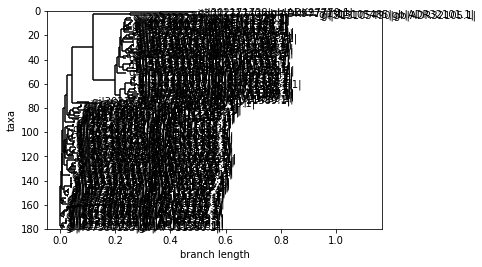

In [37]:
%matplotlib inline

Phylo.draw(tree)

...maybe more "wonderful" than *wonderful* at first, given how much information there is.

Let's re-draw the previous tree, this time without tree labels, just to see how the branching looks.

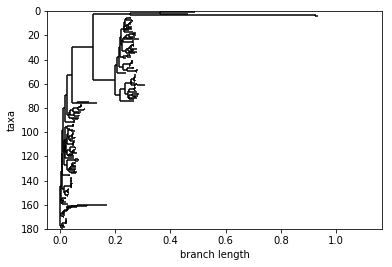

In [38]:
Phylo.draw(tree, label_func = lambda x: None)  # Don't worry about what this does

Now we're getting somewhere! We can clearly see some structure in the respective evolutionary offshoots.

### Motifs

*Sequence motifs are short, recurring patterns in DNA that are presumed to have a biological function. Often they indicate sequence-specific binding sites for proteins such as nucleases and transcription factors (TF).* --The Internet

In [39]:
from Bio import motifs  # Lowercase for some reason...

m = motifs.create(["TACAA","CATGC","TACTA","CCCAA"])

Remember the "profile" from profile HMMs? It looked something like this:

In [40]:
print(m.counts)

        0      1      2      3      4
A:   0.00   3.00   0.00   2.00   3.00
C:   2.00   1.00   3.00   0.00   1.00
G:   0.00   0.00   0.00   1.00   0.00
T:   2.00   0.00   1.00   1.00   0.00



We can visualize this information in different ways.

For instance, we can look at the *consensus* sequence, which is just the sequence formed by picking the nucleotide at each position that is most frequent.

In [41]:
print(m.counts)
print(m.consensus)

        0      1      2      3      4
A:   0.00   3.00   0.00   2.00   3.00
C:   2.00   1.00   3.00   0.00   1.00
G:   0.00   0.00   0.00   1.00   0.00
T:   2.00   0.00   1.00   1.00   0.00

TACAA


We can also generate logos!

In [42]:
m.weblogo('logo.png', stack_width = 'large')

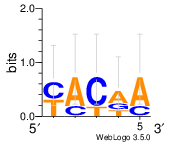

In [43]:
from IPython.display import Image
Image(filename = 'logo.png')

Remember this visualization from the last lecture? The relative heights of each letter are a measure of how frequently those nucleotides show up at those positions in the aligned sequence.

Biopython supports a number of motif formats: [JASPAR](http://jaspar.genereg.net/), MEME, TRANSFAC.

These formats are associated with databases (JASPAR, TRANSFAC) and tools (MEME).

Of particular interest are sequence motifs for transcription factor binding.

In [44]:
f = open('MA0004.1.sites')  # Unlike other parts of Biopython, can't just provide filename to open.
arnt = motifs.read(f,'sites') # JASPAR sites
print(arnt)

TF name	None
Matrix ID	None
Matrix:
        0      1      2      3      4      5
A:   4.00  19.00   0.00   0.00   0.00   0.00
C:  16.00   0.00  20.00   0.00   0.00   0.00
G:   0.00   1.00   0.00  20.00   0.00  20.00
T:   0.00   0.00   0.00   0.00  20.00   0.00





Now we can examine all sorts of properties associated with the motif.

First, what motifs are even in this file?

In [45]:
print(arnt.instances)

CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
CACGTG
AACGTG
AACGTG
AACGTG
AACGTG
CGCGTG



Next, what is the profile matrix of the motifs?

In [46]:
print(arnt.counts)

        0      1      2      3      4      5
A:   4.00  19.00   0.00   0.00   0.00   0.00
C:  16.00   0.00  20.00   0.00   0.00   0.00
G:   0.00   1.00   0.00  20.00   0.00  20.00
T:   0.00   0.00   0.00   0.00  20.00   0.00



And the consensus sequence?

In [47]:
print(arnt.consensus)

CACGTG


### Scoring Matrices

We've touched on this idea in previous lectures--the idea that not all mismatches in sequence alignments are created equal--but BioPython has this concept built-in.

For one, we can normalize the counts to be *probabilities* instead, allowing you to compare multiple motifs:

In [48]:
print(arnt.counts.normalize())

        0      1      2      3      4      5
A:   0.20   0.95   0.00   0.00   0.00   0.00
C:   0.80   0.00   1.00   0.00   0.00   0.00
G:   0.00   0.05   0.00   1.00   0.00   1.00
T:   0.00   0.00   0.00   0.00   1.00   0.00



An interesting question with normalized counts: what happens if the count is 0? Is the probability of seeing that nucleotide at that position also 0?

(Hint as to where this is going: how do you compute the probabilities of a bunch of statistically independent events? what happens if one of those events has a probability of 0?)

**It probably doesn't have a probability of 0, but it may be *close* to 0.** In machine learning, there's a concept known as "pseudocounting" in which a very small number of counts are given to variables whose probabilities we want to keep close to 0, but not *exactly* 0.

We can do that in BioPython, too:

In [49]:
print(arnt.counts.normalize(pseudocounts = 0.8))

        0      1      2      3      4      5
A:   0.21   0.85   0.03   0.03   0.03   0.03
C:   0.72   0.03   0.90   0.03   0.03   0.03
G:   0.03   0.08   0.03   0.90   0.03   0.90
T:   0.03   0.03   0.03   0.03   0.90   0.03



### Searching for Motifs

Finally, we can use BioPython to search for motifs in larger sequences.

In [50]:
from Bio import SeqIO
from Bio.Seq import Seq

largeseq = SeqIO.read('bnip3.fasta', 'fasta', arnt.alphabet).seq # Load with same alphabet as motif
smallseq = Seq('AAACCCACGTGACTATATA')

We can search for exact matches:

In [51]:
exact_matches = arnt.instances.search(smallseq)

for match in exact_matches:
    position = match[0]
    sequence = match[1]
    print(position, sequence)

5 CACGTG


In [52]:
exact_matches = arnt.instances.search(largeseq)

for match in exact_matches:
    position = match[0]
    sequence = match[1]
    print(position, sequence)

3452 CACGTG
4058 CACGTG
6181 AACGTG
8591 CGCGTG
10719 CACGTG
10998 CACGTG


### Position-Specific Scoring Matrices (PSSM)

We can also use a PSSM to search for "fuzzy" matches--instances where we don't find an *exact* match of the thing we're looking for, but rather something that's "close" (for some definition of "close").

Basically, this makes use of the counts matrix we saw before.

If we're looking for a specific motif that isn't found *exactly*, we can specify a count threshold at which mismatches in certain positions are allowed to count toward search hits.

Here's an example:

In [53]:
# First, normalize to probabilities and use pseudocounts.
pwm = arnt.counts.normalize(pseudocounts = 0.8)

# Next, take the log of all the numbers.
pssm = pwm.log_odds()

# Now, run a search for the motif, using the scoring matrix and a threshold.
results = []
threshold = 4
fuzzy_matches = pssm.search(largeseq, threshold)
for match in fuzzy_matches:
    results.append(match)
print(len(results), "fuzzy matches found with threshold of", threshold)

167 fuzzy matches found with threshold of 4


The score is a $log_2$ likelihood, so a score of 4 is $2^4=16$ times more likely to occur as part of the motif than as part of the (assumed uniform random) background.

## Administrivia

 - Assignment 3 due tonight at 11:59pm!

 - No one will bite in the Slack chat :)

 - Expect some kind of midterm-related announcement over the weekend (since I'm planning to finish it then)

 - Guest lecturer on Tuesday, then the midterm exam Thursday (Assignment 4 won't come out until the week we come back from spring break)